<a href="https://colab.research.google.com/github/Reenook/Python-AI-Projects/blob/main/Financial_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('MicrosoftStock.csv')
df.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [5]:
df.isnull().sum()

,0
index,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [6]:
df.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


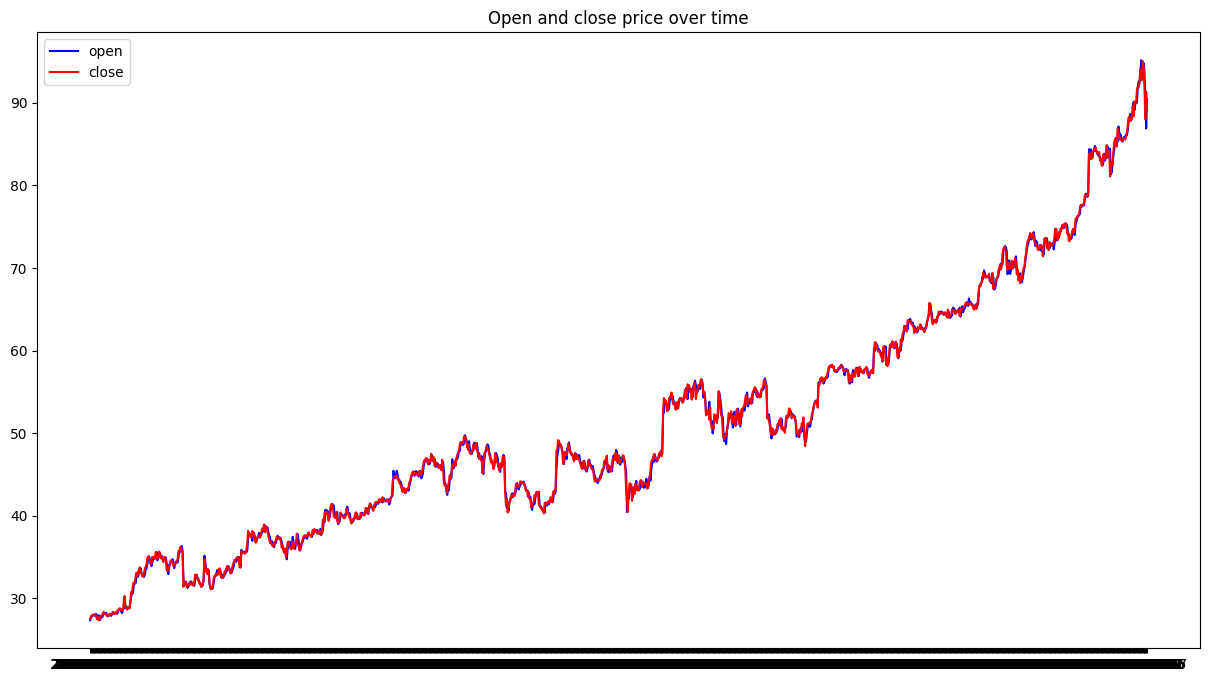

In [7]:
plt.figure(figsize=(15,8))
plt.plot(df['date'], df['open'], label = 'open', color='blue')
plt.plot(df['date'], df['close'], label = 'close', color='red')
plt.title('Open and close price over time')
plt.legend()
plt.show()

Plot Trading Volume to check for outliers

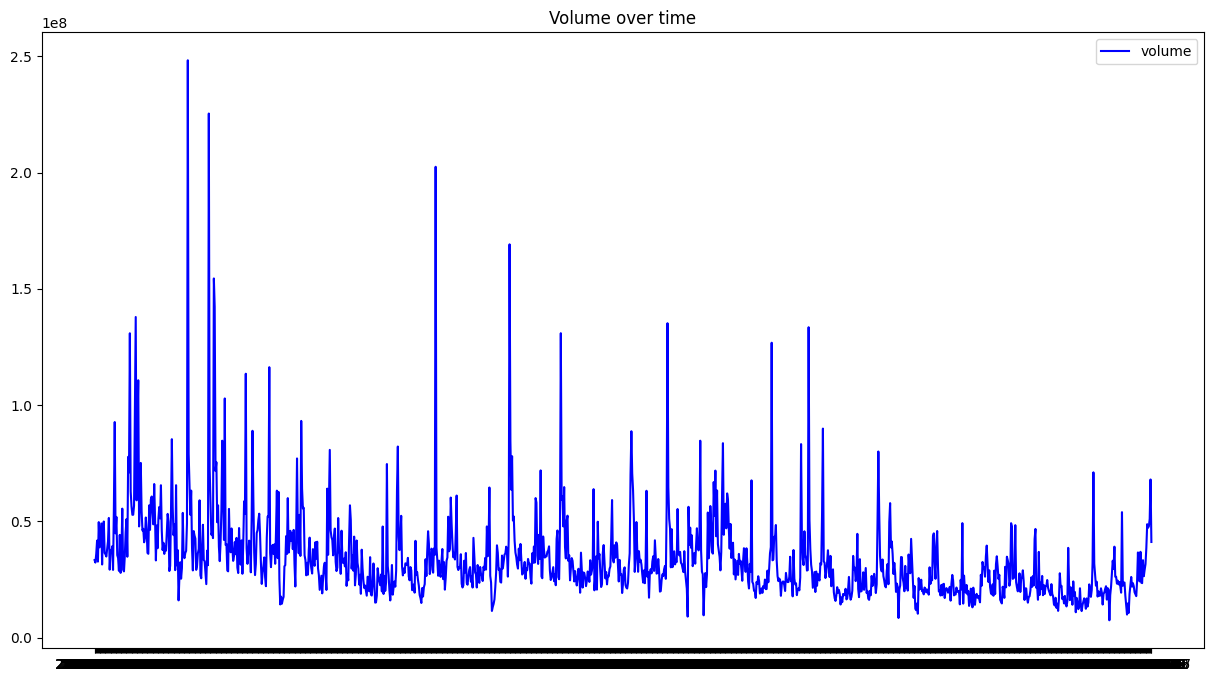

In [8]:
plt.figure(figsize=(15,8))
plt.plot(df['date'], df['volume'], label = 'volume', color='blue')
plt.title('Volume over time')
plt.legend()
plt.show()

Remove uneccesary data in this case we will only use numeric data , if the column was useful to us we would encode it so it could be used within our model

In [9]:
numeric_data=df.select_dtypes(include=["int64", "float64"])

check for correlation between features

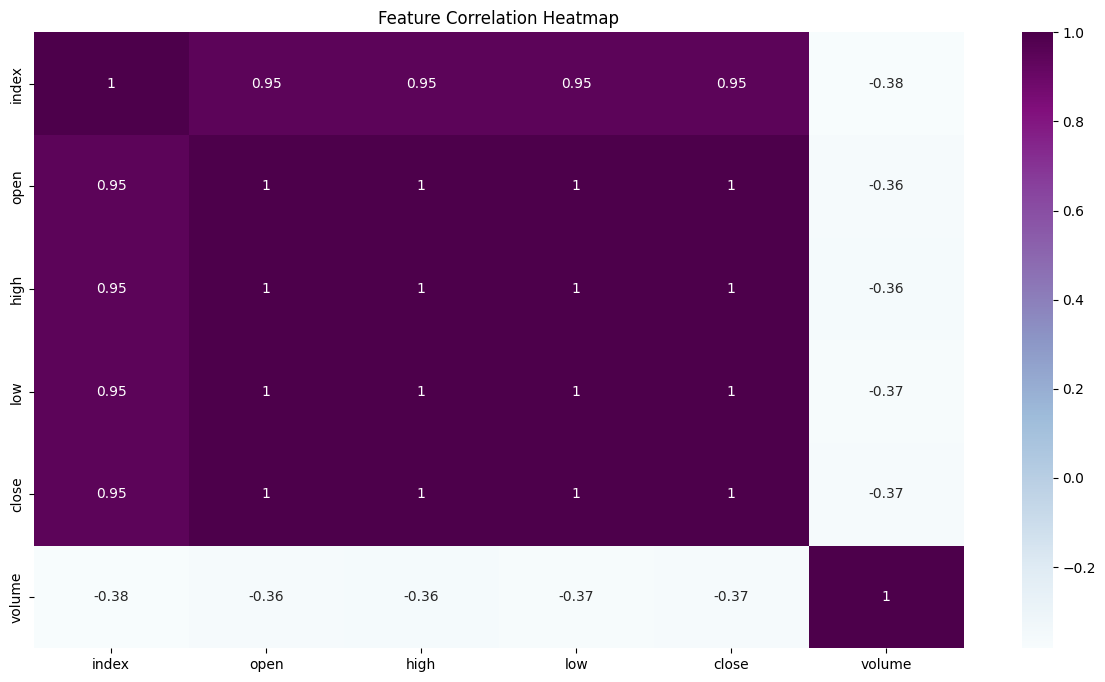

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="BuPu")
plt.title('Feature Correlation Heatmap')
plt.show()

Convert date into datetime and then create a data filter

In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
prediction=df.loc[(df['date'] > datetime(2018,1,1))&
                  (df['date'] < datetime(2018,1,1))]

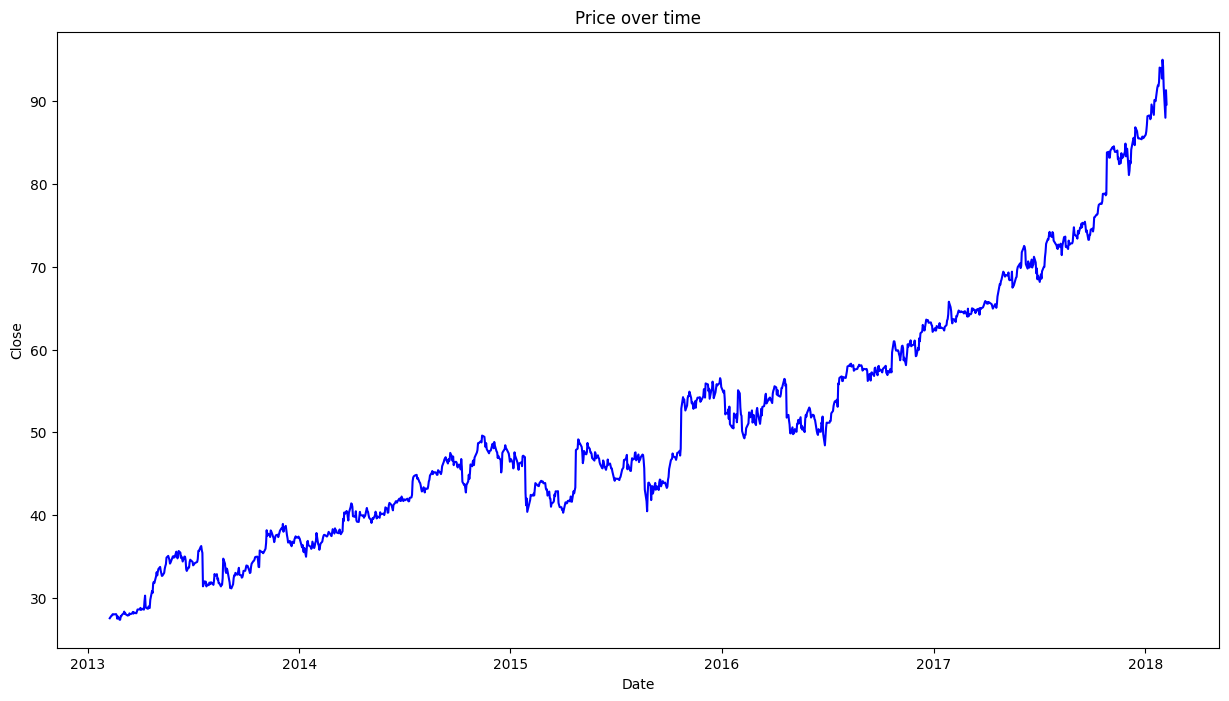

In [13]:
plt.figure(figsize=(15,8))
plt.plot(df['date'], df['close'],color='blue')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Price over time')
plt.show()

# **Model Training**

In [14]:
stock_close=df['close']
dataset=stock_close.values


In [15]:
training_data_len=int(np.ceil(len(dataset)*0.95))

In [16]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset.reshape(-1,1))

In [17]:
training_data=scaled_data[:training_data_len]

In [18]:
X_train, y_train=[],[]


In [19]:
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])

In [20]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [21]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [22]:
model=keras.models.Sequential()


Layers

In [23]:
#1st Layer
model.add(keras.layers.LSTM(64,return_sequences=True,input_shape=(X_train.shape[1],1)))
#2nd Layer
model.add(keras.layers.LSTM(64,return_sequences=False))
#3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation='relu'))
#4th Layer
model.add(keras.layers.Dropout(0.5))
#final Outpt
model.add(keras.layers.Dense(1))

In [24]:
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
training=model.fit(X_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.3041 - root_mean_squared_error: 0.5309
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0334 - root_mean_squared_error: 0.1825
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0277 - root_mean_squared_error: 0.1663
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0265 - root_mean_squared_error: 0.1627
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0249 - root_mean_squared_error: 0.1578
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0259 - root_mean_squared_error: 0.1607
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0184 - root_mean_squared_error: 0.1356
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0225 - root_mean_squared_error: 0.1500
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0225 - root_mean_squared_error: 0.1500
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0205 - root_mean_squared_error: 0.1432

In [26]:
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]

In [27]:
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [28]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))

In [34]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 720ms/step


In [35]:
train = df[:training_data_len]
test =  df[training_data_len:]

In [36]:
test = test.copy()

In [37]:
test['Predictions'] = predictions

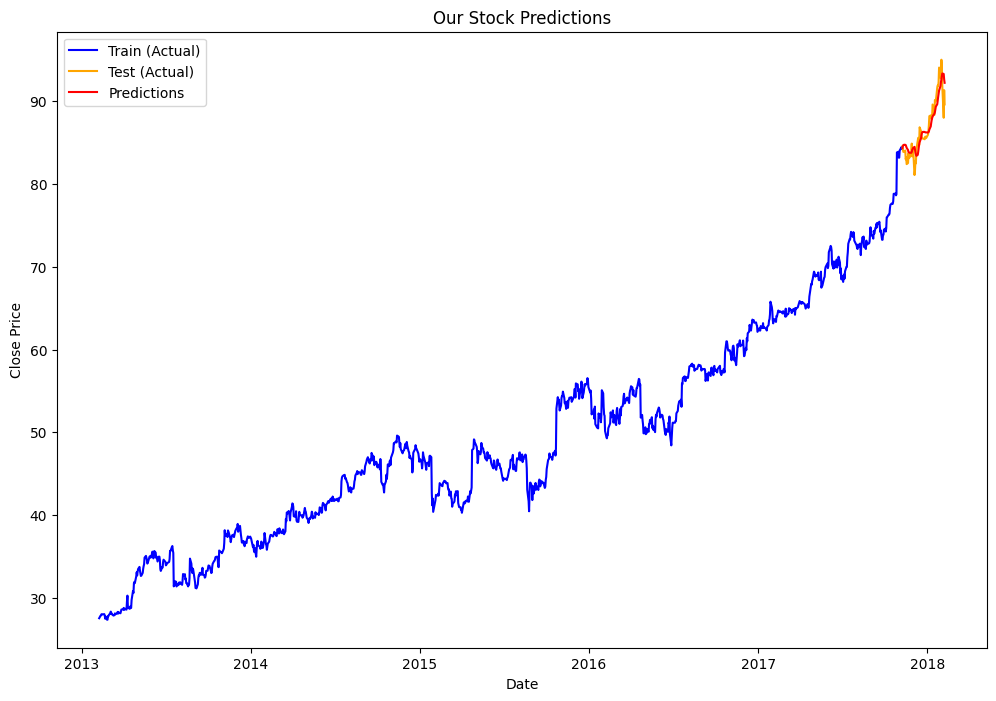

In [38]:
plt.figure(figsize=(12,8))
plt.plot(train['date'], train['close'], label="Train (Actual)", color='blue')
plt.plot(test['date'], test['close'], label="Test (Actual)", color='orange')
plt.plot(test['date'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()